# Topological Data Analysis with Persistent Homology, $1^\text{st}$ tutorial
https://raphaeltinarrage.github.io/EMAp.html
## Lesson IV: Simplicial complexes and topological invariants
Last update: 29/01/2021

In [1]:
import gudhi
import networkx as nx
import numpy as np
import random

In [2]:
def print_simplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        print_simplices(simpcomplex)
    '''
    simplices = {i: [] for i in range(simpcomplex.dimension() + 1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+str(i)+': ', end="")
        print(*simplices[i], sep = ", ")
        
def draw_simplicial_complex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.

    Input: 
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }
        
    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        draw_simplicial_complex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        draw_simplicial_complex(simpcomplex, pos=pos)
    '''
    nodes, edges = [], []
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')
    
def number_of_connected_components(simpcomplex, verbose=True):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        number_of_connected_components(simpcomplex)
    '''    
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose:
        print('The simplicial complex admits '+str(nbr_components)+' connected component(s).')
    return nbr_components

def euler_characteristic(simpcomplex, verbose=True):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.
    
    Input: 
        simpcomplex: a gudhi.SimplexTree
        
    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        euler_characteristic(simpcomplex)
    '''
    num_simplices = [0]*(simpcomplex.dimension()+1)
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1] += 1
    characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose:
        print('The simplicial complex has Euler characteristic equal to '+str(characteristic)+'.')
    return characteristic

## Triangulation of the circle

We start by considering a simplicial complex $S$ that is a triangulation of the circle.
It is given by:
- three vertices: $0$,$1$ and $2$,
- three edges: $[0,1]$, $[1,2]$ and $[2,0]$.


In [3]:
# We build a SimplexTree structure on gudhi

simpcomplex = gudhi.SimplexTree()
print(simpcomplex)

In [4]:
# We add the vertices

simpcomplex.insert([0])
simpcomplex.insert([1])
simpcomplex.insert([2])

True

In [5]:
# Let us verify that the vertices are correctly added

print_simplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [6]:
# We add the edges

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [7]:
# Let us verify that the edges are correctly added

print_simplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


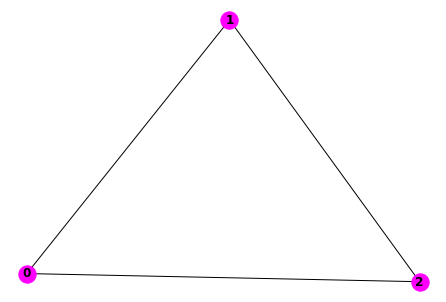

In [8]:
# The following function allows to draw the simplicial complex (uses the library networkx)

draw_simplicial_complex(simpcomplex)

In [9]:
# In Gudhi, if a simplex is added to the complex, then all its faces are
# Hence we can use the simpler code:

simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

print_simplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [10]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

print_simplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [11]:
# Be careful
# It will break Jupyter Notebook

# simpcomplex3.remove_maximal_simplex([0])

## Computing topological invariants

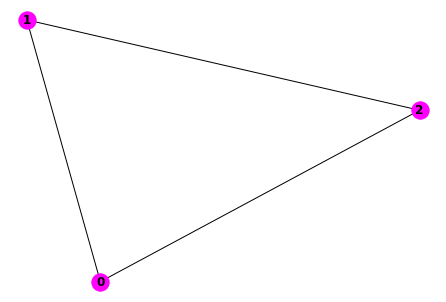

In [12]:
simpcomplexdim2 = gudhi.SimplexTree()

simpcomplexdim2.insert([0,1,2])

draw_simplicial_complex(simpcomplexdim2)

In [13]:
# The following function returns the number of connected components of the complex.
# Use verbose=True or verbose=False to print the output sentence.

number_of_connected_components(simpcomplexdim2, verbose=False)

1

In [14]:
# The following function returns the Euler characteristic of the complex.
# Use verbose=True or verbose=False to print the output sentence.

euler_characteristic(simpcomplexdim2)

The simplicial complex has Euler characteristic equal to 1.


1

In [15]:
print_simplices(simpcomplexdim2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]
Dimension 2: [0, 1, 2]


# Exercise 22

Build triangulations of the alphabet letters, and compute their Euler characteristic.

Given two letters that are homotopy equivalent, is it true thar their Euler characteristic are equal?
Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?

The simplicial complex has Euler characteristic equal to 0.


0

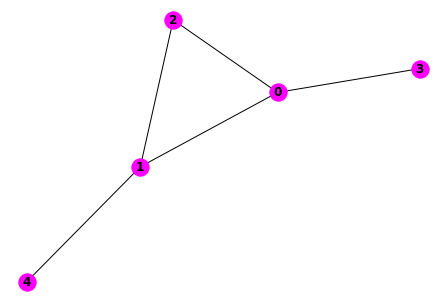

In [16]:
# We build a triangulation of the letter A

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])
simpcomplex.insert([3,0])
simpcomplex.insert([4,1])

draw_simplicial_complex(simpcomplex)
euler_characteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to -1.


-1

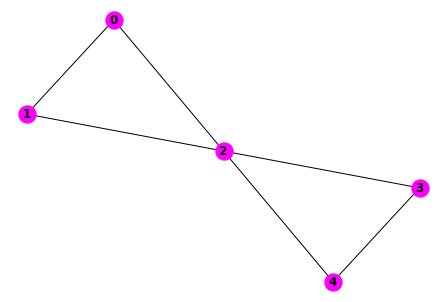

In [17]:
# We build a triangulation of the letter B

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([1, 2])
simpcomplex.insert([2, 0])
simpcomplex.insert([2, 3])
simpcomplex.insert([3, 4])
simpcomplex.insert([4, 2])

draw_simplicial_complex(simpcomplex)
euler_characteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

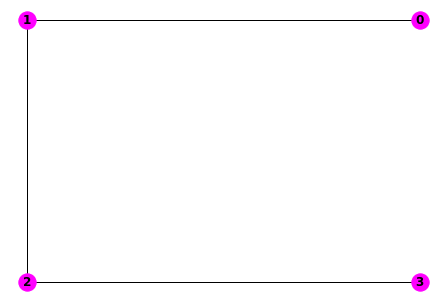

In [18]:
# We build a triangulation of the letter C

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([1, 2])
simpcomplex.insert([2, 3])

draw_simplicial_complex(simpcomplex, {0: [1, 1], 1: [0, 1], 2: [0, 0], 3: [1, 0]})
euler_characteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

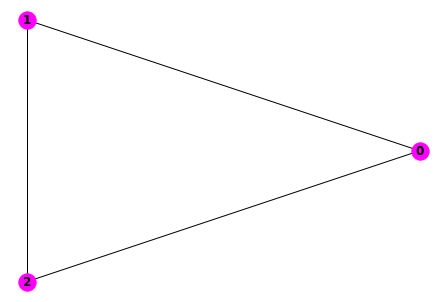

In [19]:
# We build a triangulation of the letter D

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([1, 2])
simpcomplex.insert([2, 0])

draw_simplicial_complex(simpcomplex, {0: [1, 0.5], 1: [0, 1], 2: [0, 0]})
euler_characteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 1.


1

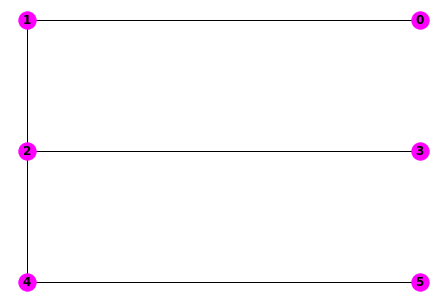

In [20]:
# We build a triangulation of the letter E

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 1])
simpcomplex.insert([1, 2])
simpcomplex.insert([2, 3])
simpcomplex.insert([2, 4])
simpcomplex.insert([4, 5])

draw_simplicial_complex(simpcomplex, {0: [1, 2], 1: [0, 2], 2: [0, 1], 3: [1, 1], 4: [0, 0], 5: [1, 0]})
euler_characteristic(simpcomplex)

# Exercise 23

For every $n$, triangulate the bouquet of $n$ circles. Compute their Euler characteristic. 

The simplicial complex has Euler characteristic equal to -14.


-14

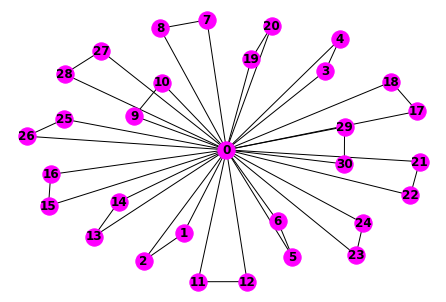

In [21]:
n = 15
simpcomplex = gudhi.SimplexTree()
for i in range(1, 2*n+1, 2):
    simpcomplex.insert([0, i])
    simpcomplex.insert([i, i+1])
    simpcomplex.insert([0, i+1])
    
draw_simplicial_complex(simpcomplex)
euler_characteristic(simpcomplex)

# Exercise 24

Implement the triangulation of the torus given in the notes.
Compute its Euler characteristic.

The simplicial complex has Euler characteristic equal to 0.


0

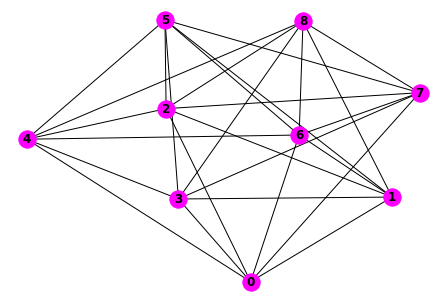

In [22]:
# The triangulation of the exercise

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([0, 2, 7])
simpcomplex.insert([0, 3, 7])
simpcomplex.insert([3, 7, 8])
simpcomplex.insert([3, 8, 4])
simpcomplex.insert([4, 8, 2])
simpcomplex.insert([4, 0, 2])

simpcomplex.insert([2, 1, 5])
simpcomplex.insert([2, 7, 5])
simpcomplex.insert([7, 5, 6])
simpcomplex.insert([7, 8, 6])
simpcomplex.insert([8, 6, 1])
simpcomplex.insert([8, 2, 1])

simpcomplex.insert([0, 1, 3])
simpcomplex.insert([1, 5, 3])
simpcomplex.insert([5, 3, 4])
simpcomplex.insert([5, 6, 4])
simpcomplex.insert([6, 4, 0])
simpcomplex.insert([6, 1, 0])

draw_simplicial_complex(simpcomplex)
euler_characteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

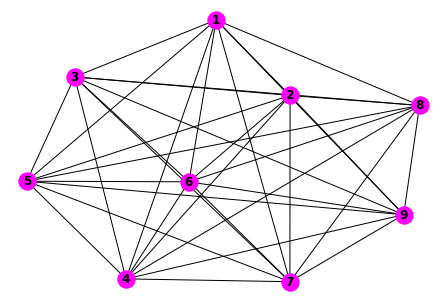

In [23]:
# My triangulation

simpcomplex = gudhi.SimplexTree()

simpcomplex.insert([1, 3, 6, 4])
simpcomplex.insert([2, 3, 6, 5])
simpcomplex.insert([1, 2, 5, 4])

simpcomplex.insert([4, 5, 8, 7])
simpcomplex.insert([4, 6, 9, 7])
simpcomplex.insert([5, 6, 9, 8])

simpcomplex.insert([1, 2, 8, 7])
simpcomplex.insert([2, 3, 9, 8])
simpcomplex.insert([1, 3, 9, 7])

draw_simplicial_complex(simpcomplex)
euler_characteristic(simpcomplex)

# Exercise 25

Consider the following dataset of $30$ points $x_0, ..., x_{29}$ in $\mathbb{R}^2$:
 ``` 
 {0: [0.29409772548731694, 0.6646626625013836],
 1: [0.01625840776679577, 0.1676405753593595],
 2: [0.15988905150272759, 0.6411323760808338],
 3: [0.9073191075894482, -0.16417982219713312],
 4: [-0.18661467838673884, 0.31618948583046413],
 5: [-0.3664040542098381, 0.9098590694955988],
 6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
 8: [0.5903822103474676, -0.7285102954232894],
 9: [0.9133851839417766, -0.6606557328320093],
 10: [-0.15516122940597588, 0.7565411235103017],
 11: [-0.38626186295039866, -0.3662321656058476],
 12: [0.005209710070218199, 0.27655964872153116],
 13: [0.670078068894711, -0.00932202688834849],
 14: [-0.011268465716772091, 0.24340880308017376],
 15: [-0.6441978411451603, -0.9672635759413206],
 16: [-0.2841794022401025, -0.6734801188906114],
 17: [-0.15473260248990717, -0.1365357396855129],
 18: [0.7177096105982121, 0.9378197891592468],
 19: [-0.4677068504994166, 0.1533930130294956],
 20: [-0.32379909116817096, 0.9694800649768063],
 21: [-0.2886940472879451, -0.039544695812395725],
 22: [-0.5900701743351606, 0.8350804500575086],
 23: [0.14931959728335853, 0.869106793774487],
 24: [-0.14500672678238824, -0.3170082291070364],
 25: [0.07324547392476122, 0.6653572287065117],
 26: [-0.662990048258566, 0.1908198608241125],
 27: [-0.25641262456436276, -0.9844196180941553],
 28: [-0.5105685407819842, -0.4236604017060557],
 29: [0.6792549581008038, -0.026215820387260003]}
 ``` 
 
 Write a function that takes as an input a parameter $r\geq 0$, and returns the simplicial complex $\mathcal{G}(r)$ defined as follows:
- the vertices of $\mathcal{G}(r)$ are the points $x_0, ..., x_{29}$,
- for all $i, j \in [0,29]$ with $i\neq j$, the edge $[i,j]$ belongs to $\mathcal{G}(r)$ if and only if $||x_i-x_j||\leq r$.

Compute the number of connected components of $\mathcal{G}(r)$ for several values of $r$. What do you observe?

In [24]:
data_set = {
    0: [0.29409772548731694, 0.6646626625013836],
    1: [0.01625840776679577, 0.1676405753593595],
    2: [0.15988905150272759, 0.6411323760808338],
    3: [0.9073191075894482, -0.16417982219713312],
    4: [-0.18661467838673884, 0.31618948583046413],
    5: [-0.3664040542098381, 0.9098590694955988],
    6: [-0.43753448716144905, -0.8820102274699417],
    7: [0.4096730199915961, -0.23801426675264126],
    8: [0.5903822103474676, -0.7285102954232894],
    9: [0.9133851839417766, -0.6606557328320093],
    10: [-0.15516122940597588, 0.7565411235103017],
    11: [-0.38626186295039866, -0.3662321656058476],
    12: [0.005209710070218199, 0.27655964872153116],
    13: [0.670078068894711, -0.00932202688834849],
    14: [-0.011268465716772091, 0.24340880308017376],
    15: [-0.6441978411451603, -0.9672635759413206],
    16: [-0.2841794022401025, -0.6734801188906114],
    17: [-0.15473260248990717, -0.1365357396855129],
    18: [0.7177096105982121, 0.9378197891592468],
    19: [-0.4677068504994166, 0.1533930130294956],
    20: [-0.32379909116817096, 0.9694800649768063],
    21: [-0.2886940472879451, -0.039544695812395725],
    22: [-0.5900701743351606, 0.8350804500575086],
    23: [0.14931959728335853, 0.869106793774487],
    24: [-0.14500672678238824, -0.3170082291070364],
    25: [0.07324547392476122, 0.6653572287065117],
    26: [-0.662990048258566, 0.1908198608241125],
    27: [-0.25641262456436276, -0.9844196180941553],
    28: [-0.5105685407819842, -0.4236604017060557],
    29: [0.6792549581008038, -0.026215820387260003]
}

In [25]:
def compute_simplicial_complex(r, data_set, draw=False):
    'Compute simplicial complex as required by exercise 25.'
    simpcomplex = gudhi.SimplexTree()
    for i in range(len(data_set)):
        simpcomplex.insert([i])
        for j in range(i+1, len(data_set)):
            point_i = data_set[i]
            point_j = data_set[j]
            dist = np.linalg.norm(np.subtract(point_i, point_j), ord=2)
            if dist <= r:
                simpcomplex.insert([i, j])
    number_of_connected_components(simpcomplex)
    euler_characteristic(simpcomplex)
    if draw:
        draw_simplicial_complex(simpcomplex)
    return simpcomplex

The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -405.
The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -405.
The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -203.
The simplicial complex admits 3 connected component(s).
The simplicial complex has Euler characteristic equal to -46.
The simplicial complex admits 13 connected component(s).
The simplicial complex has Euler characteristic equal to 9.
The simplicial complex admits 25 connected component(s).
The simplicial complex has Euler characteristic equal to 24.
The simplicial complex admits 28 connected component(s).
The simplicial complex has Euler characteristic equal to 28.


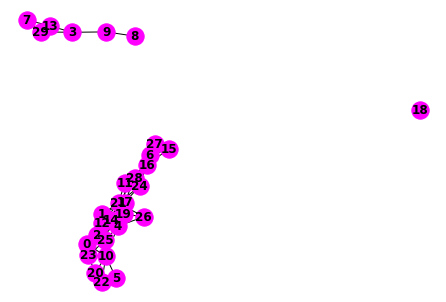

In [26]:
compute_simplicial_complex(100, data_set)
compute_simplicial_complex(10, data_set)
compute_simplicial_complex(1, data_set)
compute_simplicial_complex(0.5, data_set, draw=True)
compute_simplicial_complex(0.25, data_set)
compute_simplicial_complex(0.125, data_set)
compute_simplicial_complex(0.0625, data_set);
# compute_simplicial_complex(0, data_set);  # It will kill Jupyter kernel

# Exercise 26

A *Erdős–Rényi random graph $\mathcal{G}(n,p)$* is a simplicial complex obtained as follows:
- add $n$ vertices $1,...,n$,
- add each edge $[a,b]$, where $a,b \in [1,n]$, to the complex with probability $p$.

Builds a function that, given $n$ and $p$, outputs a simplicial complex $\mathcal{G}(n,p)$.
Observe the influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.

*Hint:* If $V$ is a list, `itertools.combinations(V,2)` can be used to generate all the non-ordered pairs `[a,b]` in `V` (package `itertools`).
The command `random.random()` can be used to generate a random number between 0 and 1, and `random.random()<p` is  `True` with probability  `p` (package `random`).

In [27]:
def erdos_renyi_graph(n, p, draw=False):
    simpcomplex = gudhi.SimplexTree()
    for i in range(1, n+1):
        simpcomplex.insert([i])
        for j in range(i+1, n+1):
            if random.random() < p:
                simpcomplex.insert([i, j])
    if draw:
        draw_simplicial_complex(simpcomplex)
    euler_characteristic(simpcomplex)
    number_of_connected_components(simpcomplex)
    return simpcomplex

The simplicial complex has Euler characteristic equal to 6.
The simplicial complex admits 6 connected component(s).
The simplicial complex has Euler characteristic equal to -1.
The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -8.
The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -21.
The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -34.
The simplicial complex admits 1 connected component(s).


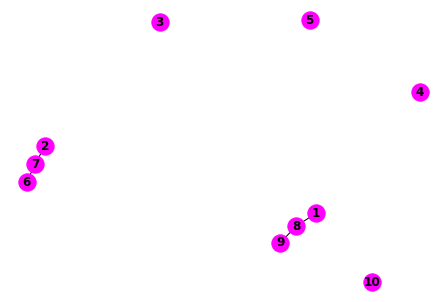

In [28]:
erdos_renyi_graph(10, 0.1, draw=True)
erdos_renyi_graph(10, 0.3)
erdos_renyi_graph(10, 0.5)
erdos_renyi_graph(10, 0.7)
erdos_renyi_graph(10, 0.9);

The simplicial complex has Euler characteristic equal to 58.
The simplicial complex admits 58 connected component(s).
The simplicial complex has Euler characteristic equal to -61.
The simplicial complex admits 7 connected component(s).
The simplicial complex has Euler characteristic equal to -175.
The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -228.
The simplicial complex admits 1 connected component(s).
The simplicial complex has Euler characteristic equal to -308.
The simplicial complex admits 1 connected component(s).


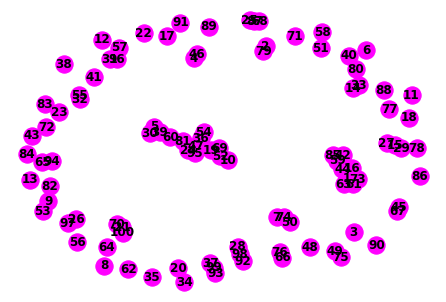

In [29]:
erdos_renyi_graph(100, 0.01, draw=True)
erdos_renyi_graph(100, 0.03)
erdos_renyi_graph(100, 0.05)
erdos_renyi_graph(100, 0.07)
erdos_renyi_graph(100, 0.09);